<a href="https://colab.research.google.com/github/Claye1/Claye1/blob/main/Clustering%20on%20Financial%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K MEANS - PAIRPLOTS

In [1]:
import pandas as pd

# Load the CSV file to examine its structure
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Display the first few rows of the dataframe and its info to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63592 entries, 0 to 63591
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TenantID                    63592 non-null  object 
 1   TenantName                  63592 non-null  object 
 2   TransactionID               63592 non-null  object 
 3   Type                        63592 non-null  object 
 4   Name                        44013 non-null  object 
 5   DateString                  63592 non-null  object 
 6   LineItemDescription         46430 non-null  object 
 7   UnitAmount                  63592 non-null  float64
 8   TaxType                     44010 non-null  object 
 9   LineAmount                  63592 non-null  float64
 10  AccountID                   0 non-null      float64
 11  Accounts_Description        0 non-null      float64
 12  Accounts_ReportingCode      0 non-null      float64
 13  Accounts_ReportingCodeName  0 n

(                               TenantID            TenantName  \
 0  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
 1  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
 2  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
 3  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
 4  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
 
                           TransactionID   Type                Name  \
 0  128d08dc-63ff-4356-9a11-546106d5891c  SPEND            Vodafone   
 1  1c27d774-e145-4f6b-9c28-a1b528fa5db0  SPEND  HM Revenue Customs   
 2  770a6044-ec79-49f5-b16e-21da0536c101  SPEND            Vodafone   
 3  19cdc3d0-a794-4d1e-a01c-6adb57be00ae  SPEND       Business Edge   
 4  e13b2c74-5cfd-4454-9c31-b9d516f5c0ca  SPEND            Vodafone   
 
             DateString LineItemDescription  UnitAmount TaxType  LineAmount  \
 0  2018-10-03T00:00:00                 NaN       14.06  INPUT2       14.06   
 1  2018-11-02T0

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import datetime as dt

# Convert DateString to datetime and extract year, month, day
data['Date'] = pd.to_datetime(data['DateString'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize UnitAmount
scaler = StandardScaler()
data['UnitAmount_Normalized'] = scaler.fit_transform(data[['UnitAmount']])

# Encode TenantID and TransactionID
label_encoder = LabelEncoder()
data['TenantID_Encoded'] = label_encoder.fit_transform(data['TenantID'])
data['TransactionID_Encoded'] = label_encoder.fit_transform(data['TransactionID'])

# Select the relevant columns for clustering
cluster_data = data[['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(cluster_data)

# Add the cluster labels to the dataframe
data['Cluster'] = -1
data.loc[cluster_data.index, 'Cluster'] = clusters

# Display the first few rows with the cluster labels
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TenantID            TenantName  \
0  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
1  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
2  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
3  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
4  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   

                          TransactionID   Type                Name  \
0  128d08dc-63ff-4356-9a11-546106d5891c  SPEND            Vodafone   
1  1c27d774-e145-4f6b-9c28-a1b528fa5db0  SPEND  HM Revenue Customs   
2  770a6044-ec79-49f5-b16e-21da0536c101  SPEND            Vodafone   
3  19cdc3d0-a794-4d1e-a01c-6adb57be00ae  SPEND       Business Edge   
4  e13b2c74-5cfd-4454-9c31-b9d516f5c0ca  SPEND            Vodafone   

            DateString LineItemDescription  UnitAmount TaxType  LineAmount  \
0  2018-10-03T00:00:00                 NaN       14.06  INPUT2       14.06   
1  2018-11-02T00:00:00                 NaN     9994.50    NONE     9994.50   
2  2018-11-02T00:00:00                 NaN       28.90  INPUT2       28.90   
3  2018-11-15T00:00:00                 NaN      150.00  INPUT2      150.00   
4  2018-12-05T00:00:00                 NaN       27.19  INPUT2       27.19   

   ...  Accounts_ReportingCode  Accounts_ReportingCodeName       Date  Year  \
0  ...                     NaN                         NaN 2018-10-03  2018   
1  ...                     NaN                         NaN 2018-11-02  2018   
2  ...                     NaN                         NaN 2018-11-02  2018   
3  ...                     NaN                         NaN 2018-11-15  2018   
4  ...                     NaN                         NaN 2018-12-05  2018   

  Month  Day  UnitAmount_Normalized  TenantID_Encoded  TransactionID_Encoded  \
0    10    3              -0.068572                 0                   4613   
1    11    2               0.943699                 0                   6990   
2    11    2              -0.067067                 0                  28741   
3    11   15              -0.054784                 0                   6465   
4    12    5              -0.067240                 0                  54428   

   Cluster  
0        3  
1        3  
2        2  
3        3  
4        0  

[5 rows x 22 columns]

<Figure size 1200x800 with 0 Axes>

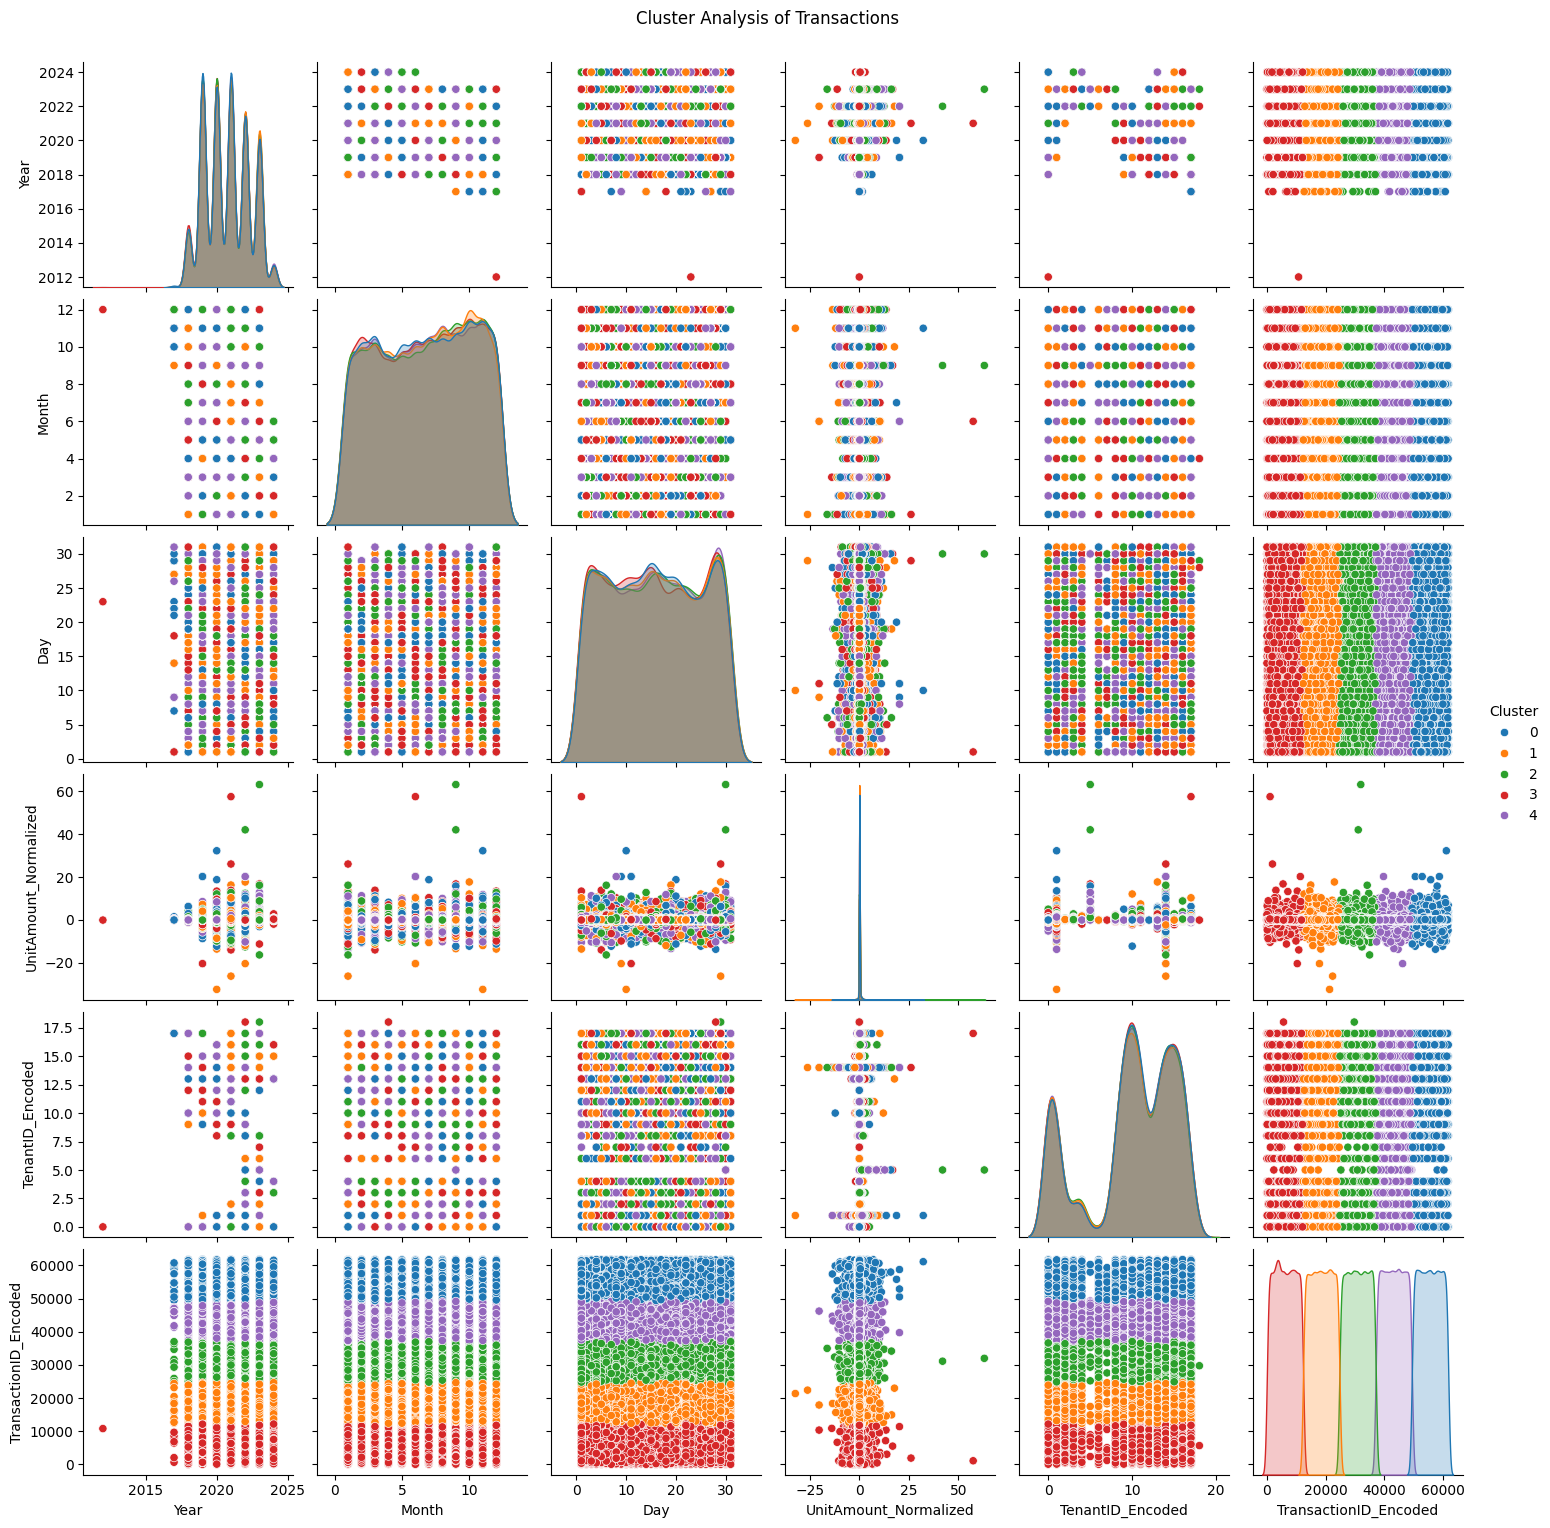

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters using a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded'], hue='Cluster', palette='tab10')
plt.suptitle('Cluster Analysis of Transactions', y=1.02)
plt.show()


# 2. DBSCAN

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN

# Load the CSV file
file_path = 'path/to/your/NEW_all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Convert DateString to datetime and extract year, month, day
data['Date'] = pd.to_datetime(data['DateString'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize UnitAmount
scaler = StandardScaler()
data['UnitAmount_Normalized'] = scaler.fit_transform(data[['UnitAmount']])

# Encode TenantID and TransactionID
label_encoder = LabelEncoder()
data['TenantID_Encoded'] = label_encoder.fit_transform(data['TenantID'])
data['TransactionID_Encoded'] = label_encoder.fit_transform(data['TransactionID'])

# Select the relevant columns for clustering
cluster_data = data[['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded']].dropna()


In [6]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(cluster_data)

# Add the cluster labels to the dataframe
data['Cluster'] = -1
data.loc[cluster_data.index, 'Cluster'] = clusters

# Display the first few rows with the cluster labels
print(data.head())


                               TenantID            TenantName  \
0  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
1  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
2  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
3  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
4  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   

                          TransactionID   Type                Name  \
0  128d08dc-63ff-4356-9a11-546106d5891c  SPEND            Vodafone   
1  1c27d774-e145-4f6b-9c28-a1b528fa5db0  SPEND  HM Revenue Customs   
2  770a6044-ec79-49f5-b16e-21da0536c101  SPEND            Vodafone   
3  19cdc3d0-a794-4d1e-a01c-6adb57be00ae  SPEND       Business Edge   
4  e13b2c74-5cfd-4454-9c31-b9d516f5c0ca  SPEND            Vodafone   

            DateString LineItemDescription  UnitAmount TaxType  LineAmount  \
0  2018-10-03T00:00:00                 NaN       14.06  INPUT2       14.06   
1  2018-11-02T00:00:00          

<Figure size 1200x800 with 0 Axes>

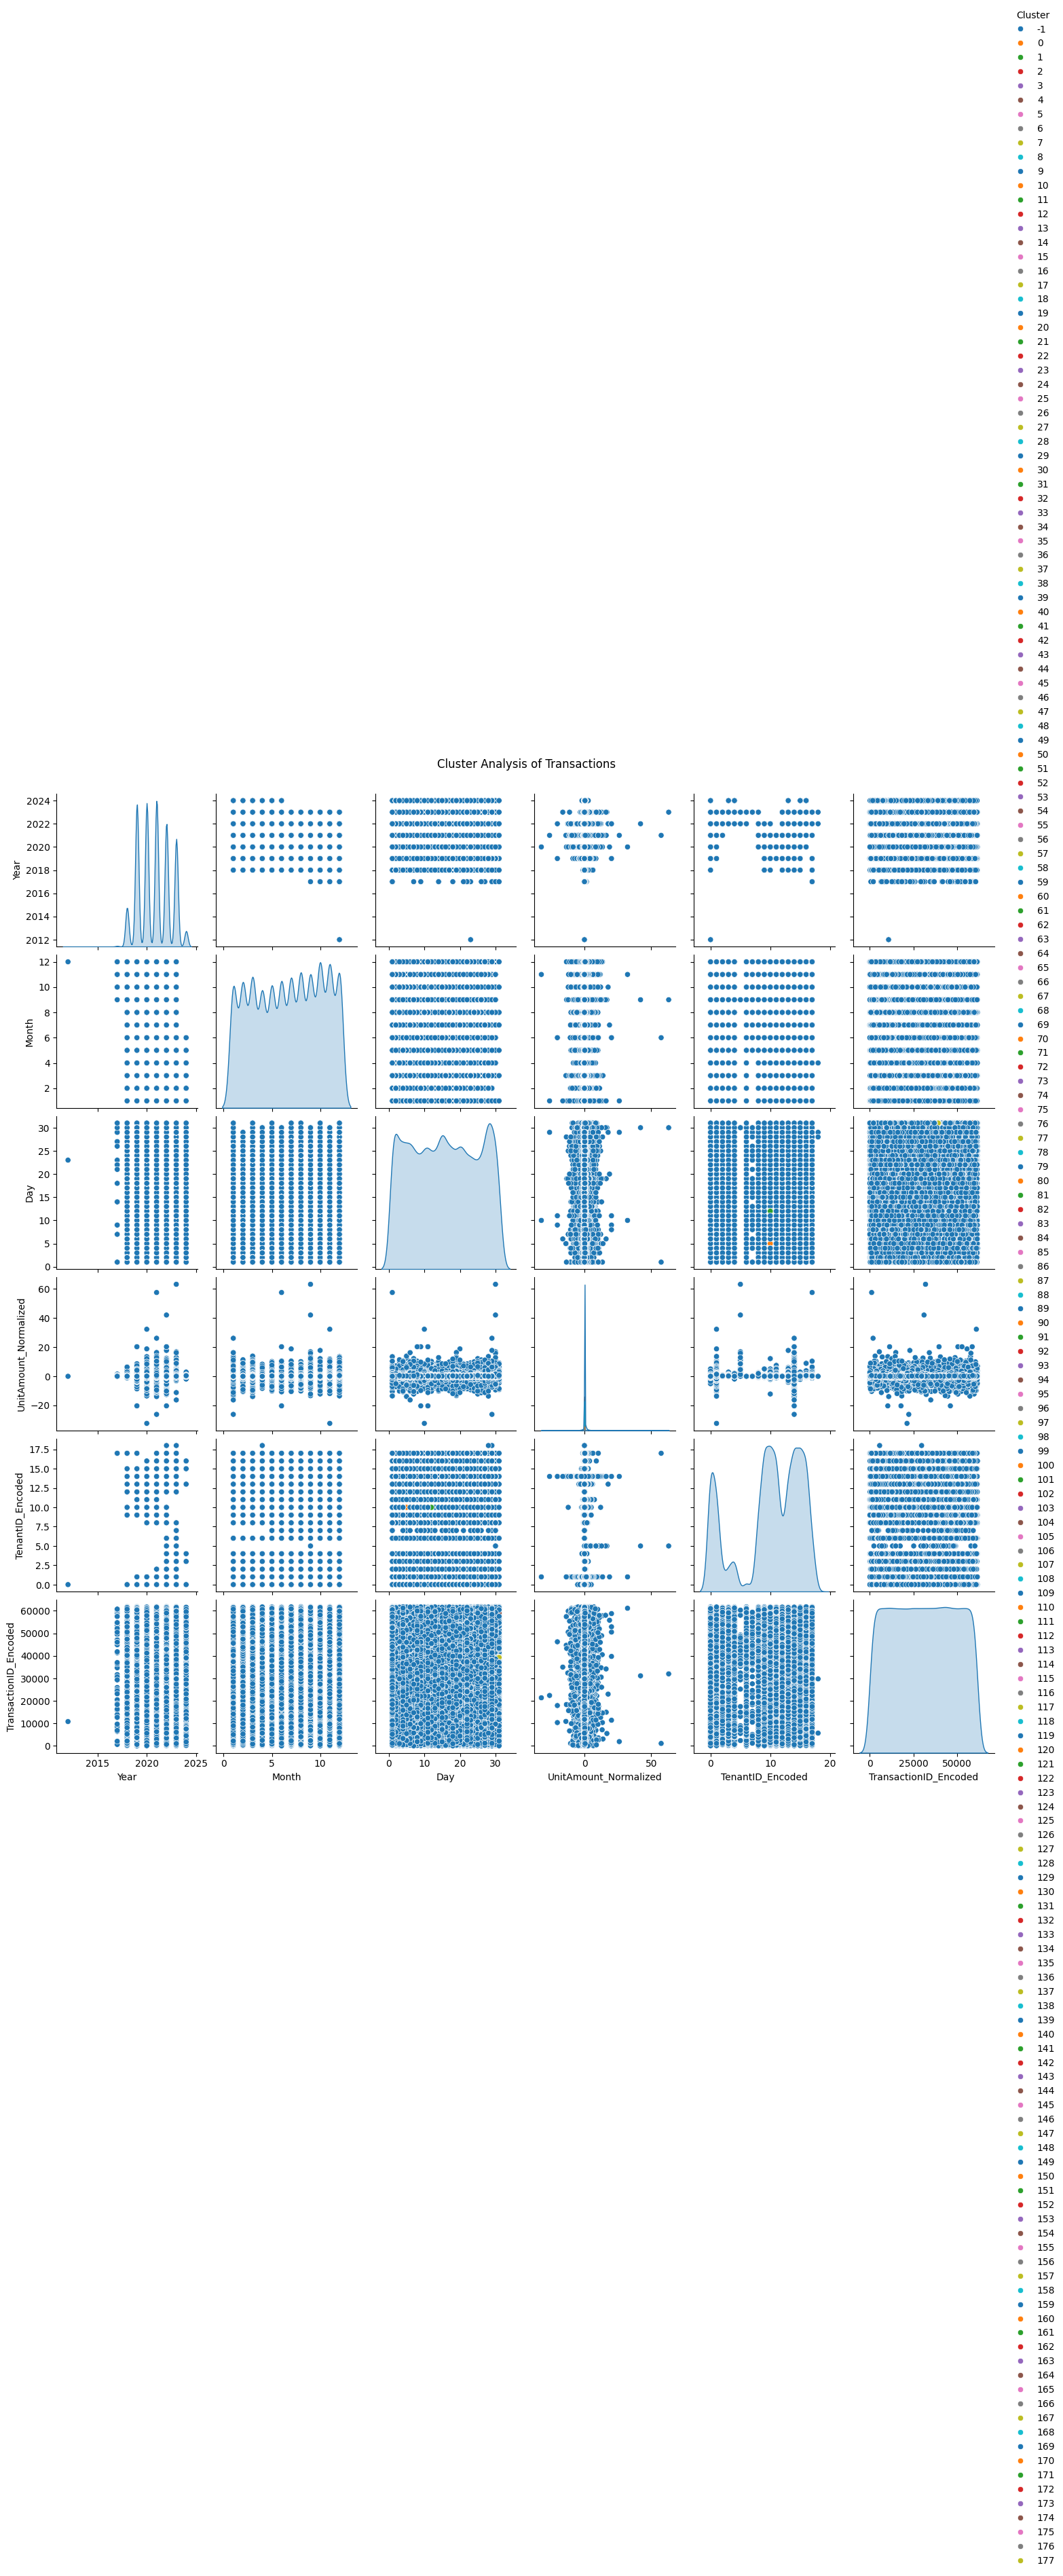

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data for visualization
cluster_data_cleaned = cluster_data.apply(pd.to_numeric, errors='coerce').dropna()
cluster_data_cleaned['Cluster'] = clusters

# Visualize clusters using a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(cluster_data_cleaned, vars=['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded'], hue='Cluster', palette='tab10')
plt.suptitle('Cluster Analysis of Transactions', y=1.02)
plt.show()


# 3. HIERARCHICAL

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV file
file_path = 'path/to/your/NEW_all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Downsize to 20,000 samples
data = data.sample(n=20000, random_state=42)

# Convert DateString to datetime and extract year, month, day
data['Date'] = pd.to_datetime(data['DateString'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize UnitAmount
scaler = StandardScaler()
data['UnitAmount_Normalized'] = scaler.fit_transform(data[['UnitAmount']])

# Encode TenantID and TransactionID
label_encoder = LabelEncoder()
data['TenantID_Encoded'] = label_encoder.fit_transform(data['TenantID'])
data['TransactionID_Encoded'] = label_encoder.fit_transform(data['TransactionID'])

# Select the relevant columns for clustering
cluster_data = data[['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded']].dropna()




In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate the linkage matrix
Z = linkage(cluster_data, method='ward')

# Apply hierarchical clustering
max_d = 50  # Set the maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to the dataframe
data['Cluster'] = -1
data.loc[cluster_data.index, 'Cluster'] = clusters

# Display the first few rows with the cluster labels
print(data.head())


                                   TenantID                TenantName  \
24145  698d05f7-1d81-4440-89a3-d3f86989a4c7       FIFTH FLOOR LIMITED   
16166  5a4277ce-3e38-4675-a55e-cda0783d1ea7     VITA BEAUTY SALON LTD   
54581  aa8958bc-8b75-44fd-88b7-e2e561416f95    TECNICA AUTOMOTIVE LTD   
36893  8cbc74b7-b352-41f3-975b-96ca4b06993b  TAILORS OF DEANSGATE LTD   
2287   077a034a-8797-4f9e-8fb0-9ec3a4dffb5e      SUNBRIGHT BLINDS LTD   

                              TransactionID     Type                 Name  \
24145  0ebeade1-bbd6-4eba-8ebe-2ef94036761f  RECEIVE                SALES   
16166  4bb8f62b-3ba0-45a0-9a28-55e1d942fc67    SPEND            ANISA ALI   
54581  699bcbc4-39d8-405d-9d18-42c32122de48    SPEND        Holiday Extra   
36893  fdc43603-6179-496e-931d-30495f1dbbdf    SPEND  T K MAXX MANCHESTER   
2287   59e6fa20-9b3e-4a0b-a399-a3d58e3276b3    SPEND              flydoor   

                DateString                     LineItemDescription  \
24145  2019-01-20T00:00:00  

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data for visualization
cluster_data_cleaned = cluster_data.apply(pd.to_numeric, errors='coerce').dropna()
cluster_data_cleaned['Cluster'] = clusters

# Visualize clusters using a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(cluster_data_cleaned, vars=['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded'], hue='Cluster', palette='tab10')
plt.suptitle('Cluster Analysis of Transactions', y=1.02)
plt.show()


<Figure size 1200x800 with 0 Axes>

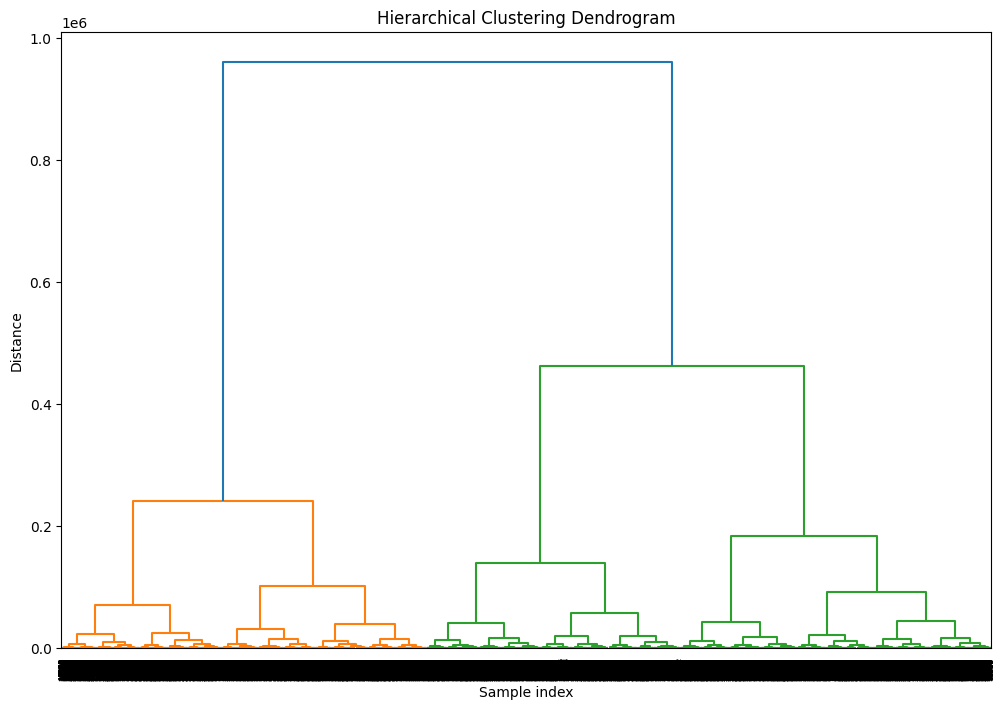

In [4]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# 4. GMM

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV file
file_path = 'path/to/your/NEW_all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Convert DateString to datetime and extract year, month, day
data['Date'] = pd.to_datetime(data['DateString'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize UnitAmount
scaler = StandardScaler()
data['UnitAmount_Normalized'] = scaler.fit_transform(data[['UnitAmount']])

# Encode TenantID and TransactionID
label_encoder = LabelEncoder()
data['TenantID_Encoded'] = label_encoder.fit_transform(data['TenantID'])
data['TransactionID_Encoded'] = label_encoder.fit_transform(data['TransactionID'])

# Select the relevant columns for clustering
cluster_data = data[['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded']].dropna()


In [6]:
from sklearn.mixture import GaussianMixture

# Apply GMM clustering
gmm = GaussianMixture(n_components=5, random_state=0)
clusters = gmm.fit_predict(cluster_data)

# Add the cluster labels to the dataframe
data['Cluster'] = -1
data.loc[cluster_data.index, 'Cluster'] = clusters

# Display the first few rows with the cluster labels
print(data.head())


                               TenantID            TenantName  \
0  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
1  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
2  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
3  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
4  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   

                          TransactionID   Type                Name  \
0  128d08dc-63ff-4356-9a11-546106d5891c  SPEND            Vodafone   
1  1c27d774-e145-4f6b-9c28-a1b528fa5db0  SPEND  HM Revenue Customs   
2  770a6044-ec79-49f5-b16e-21da0536c101  SPEND            Vodafone   
3  19cdc3d0-a794-4d1e-a01c-6adb57be00ae  SPEND       Business Edge   
4  e13b2c74-5cfd-4454-9c31-b9d516f5c0ca  SPEND            Vodafone   

            DateString LineItemDescription  UnitAmount TaxType  LineAmount  \
0  2018-10-03T00:00:00                 NaN       14.06  INPUT2       14.06   
1  2018-11-02T00:00:00          

<Figure size 1200x800 with 0 Axes>

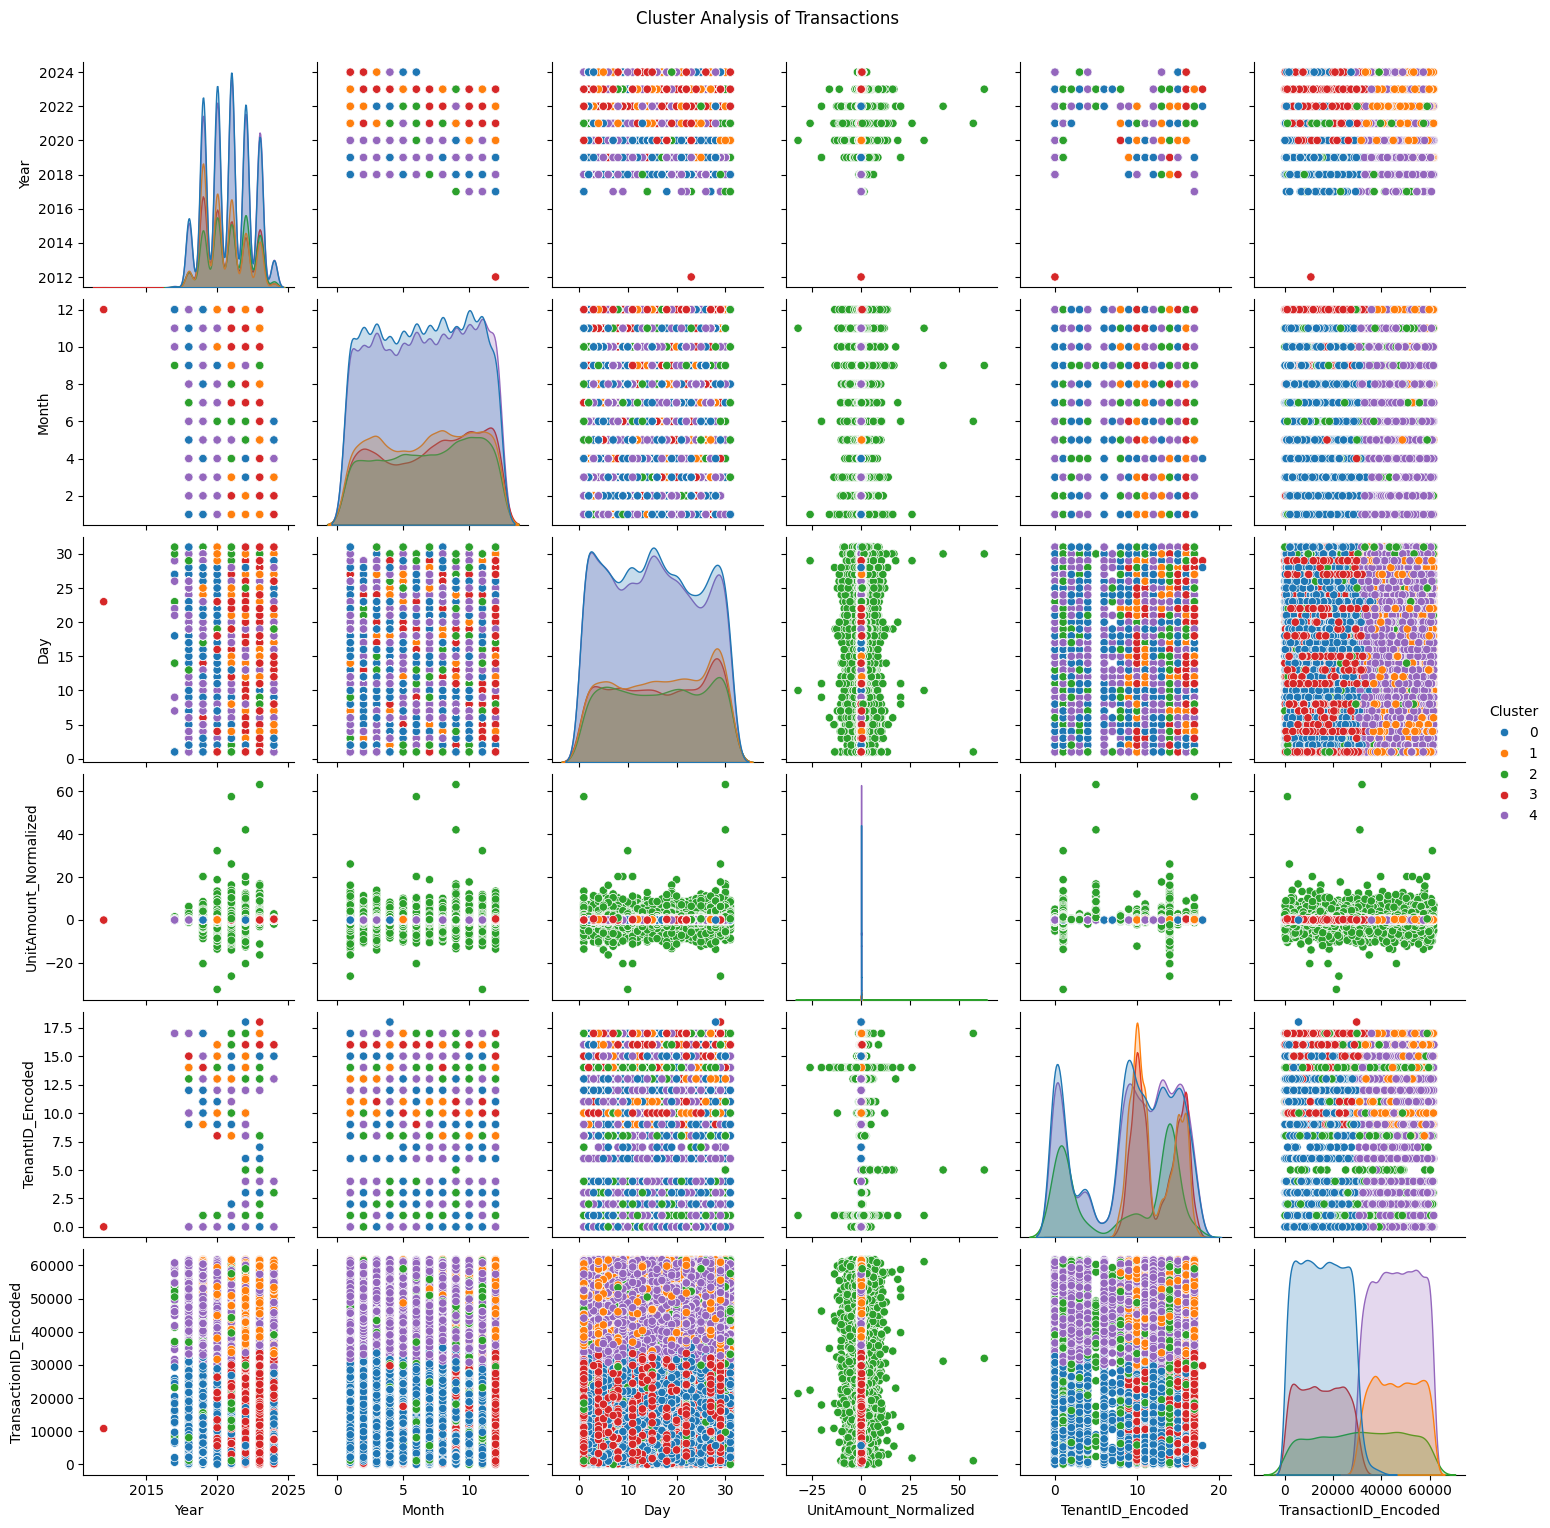

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data for visualization
cluster_data_cleaned = cluster_data.apply(pd.to_numeric, errors='coerce').dropna()
cluster_data_cleaned['Cluster'] = clusters

# Visualize clusters using a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(cluster_data_cleaned, vars=['Year', 'Month', 'Day', 'UnitAmount_Normalized', 'TenantID_Encoded', 'TransactionID_Encoded'], hue='Cluster', palette='tab10')
plt.suptitle('Cluster Analysis of Transactions', y=1.02)
plt.show()
